## Задание 2 из части II 
**Выполнила Гайдук Юлия, МЖД172**


* Выполнить лемматизацию выбранного объемного текста на русском языке, а также подсчет частоты и рангов различных словоформ и лемм.
* Построить графики зависимости относительной частоты от ранга словоформы и леммы, соответственно. 
* Проверить выполнение закона Ципфа-Мальдеброта.

В отчет включить также топ-50 самых частотных словоформ и лемм, построенные графики зависимости, 
выводы по проведенному исследованию.


Задание выполняется на материале произведения Е. И. Рериха ["Мир Огненный"](http://www.lib.ru/RERIH/Rerih_Mir1.txt)

Используется морфологический модуль pymorphy2. 

In [69]:
import sys
sys.path.append(r'C:\Users\user\AppData\Local\Programs\Python\Python36-32\Lib\site-packages')
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

Для начала создадим необходимые функции для импорта текста и его подготовки: удаления пунктуации, разбивки на слова. Также нам понадобится функция для лемматизации выбранного текста.

In [3]:
def get_text(filename):
    # Принимает на вход название файла с текстом. Возвращает текст в виде строки.
    with open(filename) as f:
        text = f.read()
    return text

In [70]:
def prepare_text(text):
    # Убирает знаки препинания, разделяет текст на слова. Возвращает текст в виде списка словоформ.
    import re
    no_punct = re.sub(r'[^\w\s]','', text)
    txt = no_punct.split()
    return txt

In [75]:
def normalize_text(text):
    # На вход подаётся список словоформ. Возвращает список лемм.
    import pymorphy2
    morph = pymorphy2.MorphAnalyzer()
    normed_text = []
    
    for word in text:
        normed_word = morph.parse(word)[0].normal_form
        normed_text.append(normed_word)
    return normed_text

Используем функции, чтобы получить в итоге две переменные: в одной будет храниться список словоформ, а другой — список лемм.

In [77]:
text = get_text('Rerih_Mir1.txt')
text = prepare_text(text) # содержит словоформы
norm_text = normalize_text(text) # содержит леммы

Создадим функции для подсчёта абсолютных и относительных частот и рангов.

In [15]:
def get_Afreq(text):
    # На вход подаётся список элементов.
    # Возвращает словарь абсолютных частот, где ключами являются элементы, 
    # а значениями — количество появлений элемента в тексте.
    from collections import Counter
    c = Counter()
    for word in text:
        c.update({word:1})
    return dict(c)

In [136]:
def get_Rfreq(text):
    # На вход подаётся список элементов. Возвращает словарь относительных частот,
    # где ключами являются элементы,
    # а значениями — их относительные частоты.
    Afreq_dict = get_Afreq(text)
    Rfreq_dict = {}
    t = len(text)
    for key, value in Afreq_dict.items():
        Rfreq_dict[key] = value/t
    return Rfreq_dict

In [17]:
def get_rank(text):
    # Принимает на вход список элементов. Возвращает словарь рангов,
    # где ключами являются элементы, а значениями — их ранги.
    # Ранг — порядковый номер слова в списке, упорядоченном по убыванию частот
    from operator import itemgetter
    Rank_dict = {}
    Afreq_dict = get_Afreq(text)
    freq_list = sorted(Afreq_dict.items(), key=itemgetter(1), reverse=True)
    for n, tpl in enumerate(freq_list, start=1):
        Rank_dict[tpl[0]] = n
    return Rank_dict

Применим наши функции и посмотрим, что получилось.

Подсчёт частоты словоформ. Выводится в несортированном виде (первые 20 элементов).

In [194]:
Afreq_text = get_Afreq(text)
Afreq_list = []
for word, number in Afreq_text.items():
    Afreq_list.append((word, number))
for tpl in Afreq_list[:20]:
    print("Элемент '{}' встречается в тексте {} раз.".format(tpl[0], tpl[1]))

Элемент 'Ур' встречается в тексте 35 раз.
Элемент 'есть' встречается в тексте 610 раз.
Элемент 'корень' встречается в тексте 4 раз.
Элемент 'Света' встречается в тексте 170 раз.
Элемент 'Огня' встречается в тексте 232 раз.
Элемент 'С' встречается в тексте 17 раз.
Элемент 'незапамятных' встречается в тексте 2 раз.
Элемент 'времен' встречается в тексте 15 раз.
Элемент 'это' встречается в тексте 375 раз.
Элемент 'Светоносное' встречается в тексте 1 раз.
Элемент 'Начало' встречается в тексте 24 раз.
Элемент 'привлекало' встречается в тексте 2 раз.
Элемент 'сердца' встречается в тексте 332 раз.
Элемент 'многих' встречается в тексте 84 раз.
Элемент 'народов' встречается в тексте 29 раз.
Элемент 'Так' встречается в тексте 899 раз.
Элемент 'из' встречается в тексте 309 раз.
Элемент 'прошлых' встречается в тексте 7 раз.
Элемент 'Заветов' встречается в тексте 6 раз.
Элемент 'перенесемся' встречается в тексте 1 раз.


Отсортируем, чтобы увидеть, какие словоформы встречаются в тексте чаще всего (топ-50 самых частотных словоформ).

In [193]:
from operator import itemgetter
Afreq_list_sorted = sorted(Afreq_text.items(), key=itemgetter(-1), reverse=True)
for tpl in Afreq_list_sorted[:50]:
    print("Словоформа '{}' встречается в тексте {} раз.".format(tpl[0], tpl[1]))

Словоформа 'и' встречается в тексте 3844 раз.
Словоформа 'в' встречается в тексте 2849 раз.
Словоформа 'не' встречается в тексте 2849 раз.
Словоформа 'к' встречается в тексте 1658 раз.
Словоформа 'но' встречается в тексте 1580 раз.
Словоформа 'как' встречается в тексте 1464 раз.
Словоформа 'на' встречается в тексте 1392 раз.
Словоформа 'что' встречается в тексте 1370 раз.
Словоформа 'может' встречается в тексте 987 раз.
Словоформа 'о' встречается в тексте 915 раз.
Словоформа 'Так' встречается в тексте 899 раз.
Словоформа 'Но' встречается в тексте 793 раз.
Словоформа 'нужно' встречается в тексте 793 раз.
Словоформа 'от' встречается в тексте 787 раз.
Словоформа 'с' встречается в тексте 758 раз.
Словоформа 'все' встречается в тексте 663 раз.
Словоформа 'можно' встречается в тексте 653 раз.
Словоформа 'есть' встречается в тексте 610 раз.
Словоформа 'Не' встречается в тексте 595 раз.
Словоформа 'для' встречается в тексте 573 раз.
Словоформа 'так' встречается в тексте 573 раз.
Словоформа 'бу

Наверху списка мы видим предлоги и союзы, что неудивительно, поскольку эти словоформы являются наиболее частотными и в языке в целом.

Повторим то же самое с лемматизированным текстом (первые 20 элементов).

In [192]:
Afreq_norm_text = get_Afreq(norm_text)
Afreq_norm_list = []
for word, number in Afreq_norm_text.items():
    Afreq_norm_list.append((word, number))
for tpl in Afreq_norm_list[:20]:
    print("Элемент '{}' встречается в тексте {} раз.".format(tpl[0], tpl[1]))

Элемент 'ур' встречается в тексте 35 раз.
Элемент 'есть' встречается в тексте 625 раз.
Элемент 'корень' встречается в тексте 19 раз.
Элемент 'свет' встречается в тексте 306 раз.
Элемент 'огонь' встречается в тексте 883 раз.
Элемент 'с' встречается в тексте 878 раз.
Элемент 'незапамятный' встречается в тексте 4 раз.
Элемент 'время' встречается в тексте 205 раз.
Элемент 'это' встречается в тексте 841 раз.
Элемент 'светоносный' встречается в тексте 9 раз.
Элемент 'начать' встречается в тексте 158 раз.
Элемент 'привлекать' встречается в тексте 30 раз.
Элемент 'сердце' встречается в тексте 881 раз.
Элемент 'многий' встречается в тексте 153 раз.
Элемент 'народ' встречается в тексте 100 раз.
Элемент 'так' встречается в тексте 1472 раз.
Элемент 'из' встречается в тексте 339 раз.
Элемент 'прошлое' встречается в тексте 49 раз.
Элемент 'завет' встречается в тексте 53 раз.
Элемент 'перенестись' встречается в тексте 1 раз.


Можно заметить интересные моменты при сравнении с частотным списком словоформ. Например, словоформа "народов" встречается в тексте 29 раз, а лемма "народ" встречается в тексте 100 раз.

Теперь отсортируем, чтобы увидеть самые частотные леммы (топ-50 самых частотных лемм).

In [191]:
from operator import itemgetter
Afreq_norm_list_sorted = sorted(Afreq_norm_text.items(), key=itemgetter(-1), reverse=True)
for tpl in Afreq_norm_list_sorted[:50]:
    print("Словоформа '{}' встречается в тексте {} раз.".format(tpl[0], tpl[1]))

Словоформа 'и' встречается в тексте 3988 раз.
Словоформа 'не' встречается в тексте 3444 раз.
Словоформа 'в' встречается в тексте 3348 раз.
Словоформа 'но' встречается в тексте 2373 раз.
Словоформа 'огненный' встречается в тексте 2167 раз.
Словоформа 'к' встречается в тексте 1743 раз.
Словоформа 'мир' встречается в тексте 1704 раз.
Словоформа 'быть' встречается в тексте 1662 раз.
Словоформа 'как' встречается в тексте 1617 раз.
Словоформа 'мочь' встречается в тексте 1614 раз.
Словоформа 'на' встречается в тексте 1575 раз.
Словоформа 'так' встречается в тексте 1472 раз.
Словоформа 'весь' встречается в тексте 1426 раз.
Словоформа 'что' встречается в тексте 1418 раз.
Словоформа 'нужно' встречается в тексте 1291 раз.
Словоформа 'можно' встречается в тексте 1163 раз.
Словоформа 'человек' встречается в тексте 1144 раз.
Словоформа 'о' встречается в тексте 1128 раз.
Словоформа 'дух' встречается в тексте 980 раз.
Словоформа 'такой' встречается в тексте 966 раз.
Словоформа 'они' встречается в текс

В основном топ элементов не изменился в сравнении с сортировкой словоформ, но мы можем увидеть несколько новых элементов: 'огненный', 'человек', 'дух'. Можно предположить, что раз произведение озаглавлено "Мир Огненный", то данному вопросу будет посвящена значительная часть содержания, что и отражается в частотном списке лемм. 

Выведем ранги словоформ и лемм (выводятся первые 20 элементов). 

In [189]:
Rank_text = get_rank(text) # ранги словоформ
Rank_norm_text = get_rank(norm_text) # ранги лемм

In [190]:
Rank_list = []
for word, number in Rank_text.items():
    Rank_list.append((word, number))
for tpl in Rank_list[:20]:
    print("Словоформа '{}' имеет ранг {}.".format(tpl[0], tpl[1]))

Словоформа 'и' имеет ранг 1.
Словоформа 'в' имеет ранг 2.
Словоформа 'не' имеет ранг 3.
Словоформа 'к' имеет ранг 4.
Словоформа 'но' имеет ранг 5.
Словоформа 'как' имеет ранг 6.
Словоформа 'на' имеет ранг 7.
Словоформа 'что' имеет ранг 8.
Словоформа 'может' имеет ранг 9.
Словоформа 'о' имеет ранг 10.
Словоформа 'Так' имеет ранг 11.
Словоформа 'Но' имеет ранг 12.
Словоформа 'нужно' имеет ранг 13.
Словоформа 'от' имеет ранг 14.
Словоформа 'с' имеет ранг 15.
Словоформа 'все' имеет ранг 16.
Словоформа 'можно' имеет ранг 17.
Словоформа 'есть' имеет ранг 18.
Словоформа 'Не' имеет ранг 19.
Словоформа 'для' имеет ранг 20.


In [195]:
Rank_norm_list = []
for word, number in Rank_norm_text.items():
    Rank_norm_list.append((word, number))
for tpl in Rank_norm_list[:20]:
    print("Словоформа '{}' имеет ранг {}.".format(tpl[0], tpl[1]))

Словоформа 'и' имеет ранг 1.
Словоформа 'не' имеет ранг 2.
Словоформа 'в' имеет ранг 3.
Словоформа 'но' имеет ранг 4.
Словоформа 'огненный' имеет ранг 5.
Словоформа 'к' имеет ранг 6.
Словоформа 'мир' имеет ранг 7.
Словоформа 'быть' имеет ранг 8.
Словоформа 'как' имеет ранг 9.
Словоформа 'мочь' имеет ранг 10.
Словоформа 'на' имеет ранг 11.
Словоформа 'так' имеет ранг 12.
Словоформа 'весь' имеет ранг 13.
Словоформа 'что' имеет ранг 14.
Словоформа 'нужно' имеет ранг 15.
Словоформа 'можно' имеет ранг 16.
Словоформа 'человек' имеет ранг 17.
Словоформа 'о' имеет ранг 18.
Словоформа 'дух' имеет ранг 19.
Словоформа 'такой' имеет ранг 20.


Итак, у нас есть частоты и ранги словоформ и лемм. Теперь можно построить графики зависимости относительной частоты от ранга словоформ и лемм. 

Начнем со словоформ. Для построеня графика будет использоваться библиотека matplotlib.

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

Нам понадобятся список относительных частот словоформ. Воспользуемся функцией, написанной ранее. 

In [108]:
Rfreq_text = get_Rfreq(text)

Теперь положим частоты на ось y, а ранги — на ось х.

In [197]:
y = sorted(Rfreq_text.values(), reverse=True) # относительная частота
x = sorted(Rank_text.values()) # ранг

Построим график и посмотрим, что получилось.

Text(0.5,1,'Зависимость относительной частоты от ранга словоформы')

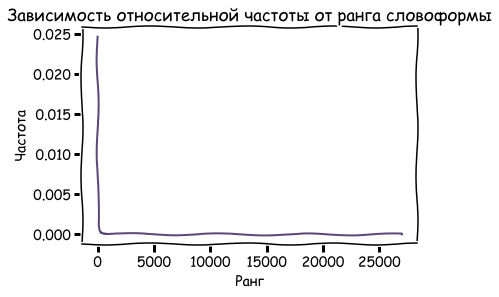

In [198]:
plt.xkcd()
plt.plot(x, y, color='#5b4878')
plt.xlabel('Ранг')
plt.ylabel('Частота')
plt.title('Зависимость относительной частоты от ранга словоформы')

Мы видим, что частота обратно пропорциональна рангу. Чем выше частота, тем меньше ранг, и наоборот.

Теперь построим то же самое для нормализованного текста.

Text(0.5,1,'Зависимость относительной частоты от ранга леммы')

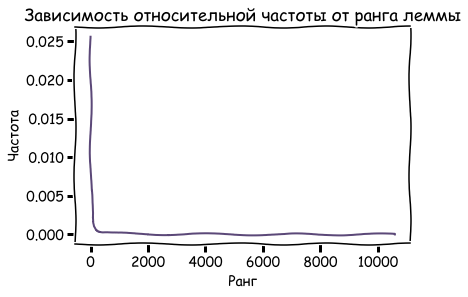

In [120]:
Rfreq_norm_text = get_Rfreq(norm_text)

y = sorted(Rfreq_norm_text.values(), reverse=True) # относительная частота
x = sorted(Rank_norm_text.values()) # ранг

plt.xkcd()
plt.plot(x, y, color='#5b4878')
plt.xlabel('Ранг')
plt.ylabel('Частота')
plt.title('Зависимость относительной частоты от ранга леммы')

Как видно, картина аналогичная: частота обратно пропорциональна рангу. Можно сказать, что эмпирический закон Ципфа выполняется. 

**Выводы**

* Исследование показало, что в топе списка частот словоформ в основном встречаются служебные части речи. Их много также и в топе списка частот лемм. Помимо широкого использования в языке, служебные части речи также являются неизменяемыми, поэтому для им не требуется лемматизация.

* Лидеры частотности словоформ в выбранном произведении во многом совпадают с лидерами частотности в русском языке в целом, например словоформы *и*, *в*, *не*.

* Анализ списка частотности лемм показал, что в выбранном произведении в топе списка частот оказались слова, тесно связанные с тематикой произведения (например *огненный*, *человек*, *дух*. Можно предположить, что в текстах узкой направленности или специализированных текстах в списке частотности лемм будут присутствовать слова, связанные с тематикой текста. 

* При построении графиков зависимости частоты от ранга для словоформ и лемм выяснилось, что чем выше частота, тем меньше ранг. Частота обратно пропорциональна рангу и для словоформ, и для лемм, что подтверждает закон Ципфа. 